# Analisis Sentimen Tweet Deforestasi dengan IndoBERT

Menyimpan token autentikasi untuk mengakses Twitter API melalui tool tweet-harvest.

## 1. Setup Environment

In [ ]:
#@title Twitter Auth Token
twitter_auth_token = 'e95d73bd6949da13c44da2b8acc3a6181584bef2'

In [ ]:
# Mencegah Colab disconnect
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg
!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list
!sudo apt-get update
!sudo apt-get install nodejs -y
!node -v

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not s

In [ ]:
!pip install playwright
!playwright install-deps
!playwright install chromium

Installing dependencies...
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu 

## 2. Scraping Data Twitter

In [ ]:
filename = 'penggundulanhutan.csv'
search_keyword = '"Deforestasi", "Hutan Gundul", " since:2025-11-20 until:2025-12-20 lang:id'
limit = 1000

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
# Scraping Twitter - PERBAIKAN PATH
filename = 'penggundulanhutan.csv'
!npx --yes tweet-harvest@latest \
    -o "penggundulanhutan.csv" \
    -s "deforestasi lang:id" \
    --tab "LATEST" \
    -l 1000 \
    --token "{twitter_auth_token}"

⠙⠹⠸⠼Tweet Harvest [v2.7.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/penggundulanhutan.csv, renaming to ./tweets-data/penggundulanhutan.old.csv

-- Scrolling... (1)
Filling in keywords: deforestasi lang:id

 (2) (3) (4) (5)

Your tweets saved to: /content/tweets-data/penggundulanhutan.csv
Total tweets saved: 20

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/penggundulanhutan.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/penggundulanhutan.csv
Total tweets saved: 60

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/penggundulanhutan.csv
Total tweets saved: 80



In [ ]:
import pandas as pd

file_path = f"tweets-data/{filename}"
df = pd.read_csv(file_path, delimiter=",")
print(f"Jumlah tweet: {len(df)}")
display(df)

Jumlah tweet: 1018


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,2008472534883471790,2026-01-06T17:25:00.000Z,0,@arcfilmworks ati ati deforestasi tuh oa nya ....,2008590638032580930,NaN,arcfilmworks,in,NaN,0,0,0,https://x.com/Lszkim/status/2008590638032580930,1363868258,Lszkim
1,2008251495515648272,2026-01-06T16:07:40.000Z,0,@BishamonAvatar @AJEnglish @BBCIndonesia @CNNI...,2008571175736168679,NaN,BishamonAvatar,in,NaN,0,0,0,https://x.com/grok/status/2008571175736168679,1720665183188922368,grok
2,2008543637651812643,2026-01-06T14:40:40.000Z,0,@birkeehn fitnah lebih kejam dari deforestasi,2008549282996203618,NaN,birkeehn,in,NaN,0,0,0,https://x.com/riversainz/status/20085492829962...,1849787518704918528,riversainz
3,2008546871694987523,2026-01-06T14:31:05.000Z,0,"Sedih ya, sebenarnya masyarakat (yg terdampak ...",2008546871694987523,NaN,NaN,in,NaN,1,0,0,https://x.com/deijgoodatchem/status/2008546871...,1275264855511928834,deijgoodatchem
4,2008523838024565138,2026-01-06T12:59:34.000Z,301,Diaspora Aceh di AS menggelar demonstrasi dama...,2008523838024565138,https://pbs.twimg.com/ext_tw_video_thumb/20085...,NaN,in,NaN,3,4,147,https://x.com/Aceh/status/2008523838024565138,9688522,Aceh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,2004735701624258881,2025-12-27T02:51:03.000Z,2,@Heraloebss Negeri ini sedang menuai panen has...,2004746823760838863,NaN,Heraloebss,in,NaN,0,0,0,https://x.com/JayaManula/status/20047468237608...,1647571685036654593,JayaManula
1014,2004534039966003455,2025-12-27T02:39:58.000Z,0,"@Kampay10 @indepenSumatera Oh, paham sekarang—...",2004744035227865309,NaN,Kampay10,in,NaN,0,1,0,https://x.com/grok/status/2004744035227865309,1720665183188922368,grok
1015,2004726200405737519,2025-12-27T02:09:42.000Z,0,@Heraloebss @setkabgoid @KemenkesRI Pemulihan ...,2004736414240616788,NaN,Heraloebss,in,NaN,0,0,0,https://x.com/TereLiye320043/status/2004736414...,1842912189382082560,TereLiye320043
1016,2004734680944537619,2025-12-27T02:02:48.000Z,0,Transisi energi terus dipercepat. Namun riset ...,2004734680944537619,NaN,NaN,in,NaN,0,0,0,https://x.com/ReviewSust16640/status/200473468...,1857742040102219779,ReviewSust16640


## 3. Preprocessing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Load dataset dari direktori Colab
file_path = '/content/tweets-data/penggundulanhutan.csv'
df = pd.read_csv(file_path)

print(f"Data berhasil dimuat: {len(df)} baris.")
df.head()

# DESKRIPSI DATASET
print("=" * 50)
print("DESKRIPSI DATASET")
print("=" * 50)
print(f"Sumber Data      : Twitter (X)")
print(f"Topik            : Deforestasi & Pengundulan Hutan")
print(f"Periode          : 20 Nov - 20 Des 2025")
print(f"Ukuran Dataset   : {len(df)} tweets")
print(f"Jumlah Kolom     : {len(df.columns)}")
print(f"Kolom yang ada   : {list(df.columns)}")
print("=" * 50)

Data berhasil dimuat: 1018 baris.
DESKRIPSI DATASET
Sumber Data      : Twitter (X)
Topik            : Deforestasi & Pengundulan Hutan
Periode          : 20 Nov - 20 Des 2025
Ukuran Dataset   : 1018 tweets
Jumlah Kolom     : 15
Kolom yang ada   : ['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username']


In [ ]:
# Fungsi preprocessing
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Hapus URL
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter non-alfabet
    text = re.sub(r'\s+', ' ', text).strip()  # Normalisasi spasi
    return text

print(f"Data awal: {len(df)} tweets")

# Terapkan preprocessing
df['cleaned_text'] = df['full_text'].apply(clean_text)
print("Pembersihan teks selesai.")

# Filter tweet dengan minimal 5 kata
df = df[df['cleaned_text'].apply(lambda x: len(x.split()) >= 5)]
print(f"Data setelah filter (min 5 kata): {len(df)} tweets")

# Stopwords Indonesia
indo_stopwords = set(['yang', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'dengan', 'untuk',
                      'pada', 'adalah', 'dalam', 'tidak', 'akan', 'atau', 'juga', 'ada',
                      'bisa', 'lebih', 'sudah', 'saja', 'karena', 'seperti', 'oleh', 'mereka',
                      'kita', 'saya', 'anda', 'dia', 'kalau', 'jadi', 'harus', 'lagi', 'pun'])

Data awal: 1018 tweets
Pembersihan teks selesai.
Data setelah filter (min 5 kata): 1000 tweets


## 4. Labeling Sentimen (2 Kelas: Positif/Negatif)

**REVISI:** Labeling langsung 2 kelas tanpa kelas Netral dan tanpa confidence score

In [ ]:
# LABELING 2 KELAS (TANPA NETRAL, TANPA CONFIDENCE SCORE)

import re

def label_sentiment(text):
    """
    Labeling dengan pattern matching untuk 2 kelas: Positif dan Negatif.
    Tanpa kelas Netral dan tanpa confidence score.
    """
    text = str(text).lower()

    # POLA POSITIF - Konteks solusi, keberhasilan, dukungan
    positive_patterns = [
        # Keberhasilan menurunkan/menekan deforestasi
        r'deforestasi.{0,30}(turun|berkurang|ditekan|menurun|rendah|nol|berhenti)',
        r'(turun|berkurang|ditekan|menurun).{0,30}deforestasi',
        r'(nol|zero|tanpa|stop|anti).{0,10}deforestasi',
        r'(berhasil|sukses|mampu|bisa).{0,30}(tekan|kurangi|hentikan|cegah).{0,20}deforestasi',

        # Reboisasi dan restorasi
        r'(reboisasi|restorasi|penghijauan|penanaman pohon)',
        r'(tanam|menanam).{0,20}(pohon|bibit|hutan)',
        r'(pohon|hutan).{0,20}(ditanam|bertambah|pulih)',
        r'(juta|ribu|ribuan).{0,10}(pohon|bibit).{0,10}(ditanam|tanam)',

        # Konservasi dan perlindungan
        r'(konservasi|pelestarian|perlindungan).{0,20}hutan',
        r'(melindungi|menjaga|melestarikan|merawat).{0,20}hutan',
        r'(lindungi|jaga|selamatkan|lestarikan).{0,20}hutan',
        r'hutan.{0,20}(dilindungi|dijaga|dilestarikan|terjaga)',

        # Hasil positif lingkungan
        r'(emisi|karbon).{0,20}(turun|berkurang|menurun)',
        r'(hijau|lestari|asri).{0,20}(kembali|lagi|tetap)',
        r'hutan.{0,20}(pulih|membaik|hijau kembali)',
        r'(net gain|forest gain|penambahan hutan)',

        # Kebijakan positif
        r'(moratorium|larangan).{0,20}(deforestasi|penebangan|pembukaan lahan)',
        r'(kebijakan|program|komitmen).{0,20}(anti deforestasi|pro lingkungan|hijau)',

        # Ekspresi dukungan untuk lingkungan
        r'(setuju|dukung|mendukung).{0,30}(lindungi|jaga|lestarikan|konservasi).{0,20}hutan',
        r'(prioritas|utama|penting).{0,20}(melindungi|menjaga|konservasi).{0,20}hutan',

        # Sustainable/berkelanjutan
        r'(sawit|pertanian|industri).{0,20}(berkelanjutan|sustainable|ramah lingkungan)',
        r'(tanpa|bebas).{0,10}deforestasi',

        # Apresiasi dan pencapaian
        r'(bukti|contoh|teladan).{0,20}(nyata|baik|positif)',
        r'(apresiasi|bangga|senang).{0,30}(lingkungan|hutan|konservasi)',
    ]

    # POLA NEGATIF - Konteks masalah, kerusakan, kritik
    negative_patterns = [
        # Kerusakan hutan aktif
        r'hutan.{0,20}(rusak|hancur|hilang|habis|gundul|musnah|terbakar)',
        r'(rusak|hancur|hilang|habis|gundul).{0,20}hutan',
        r'(kerusakan|kehancuran|kehilangan).{0,20}hutan',
        r'deforestasi.{0,20}(parah|masif|besar|meningkat|meluas)',
        r'(laju|tingkat|angka).{0,10}deforestasi.{0,10}(tinggi|naik|meningkat)',

        # Penebangan ilegal
        r'(ilegal|liar|illegal).{0,20}(logging|penebangan|pembalakan)',
        r'(pembalakan|penebangan|pembabatan).{0,20}(liar|ilegal|masif)',
        r'(mafia|kartel|sindikat).{0,20}(hutan|kayu|logging)',

        # Bencana akibat deforestasi
        r'(banjir|longsor|kekeringan|bencana).{0,30}(akibat|karena|dampak|efek).{0,20}(deforestasi|penebangan|gundul)',
        r'(deforestasi|penebangan|hutan hilang).{0,30}(sebab|penyebab|akibatkan).{0,20}(banjir|longsor|bencana)',
        r'(korban|mengungsi|evakuasi|meninggal).{0,30}(banjir|longsor|bencana)',

        # Kebakaran hutan
        r'(kebakaran|terbakar|api).{0,20}(hutan|lahan)',
        r'(hutan|lahan).{0,20}(terbakar|kebakaran|dilahap api)',
        r'(asap|kabut asap|polusi).{0,20}(kebakaran|hutan)',

        # Eksploitasi dan perusakan
        r'(eksploitasi|mengeruk|menguras|membabat).{0,20}(hutan|alam|sumber daya)',
        r'(sawit|tambang|perkebunan).{0,30}(rusak|hancur|habiskan).{0,20}hutan',
        r'hutan.{0,20}(dikorbankan|dihabiskan|dibabat).{0,20}(sawit|tambang|bisnis)',

        # Kritik kebijakan/pemerintah
        r'(pemerintah|rezim|penguasa).{0,30}(gagal|bobrok|korup).{0,20}(lingkungan|hutan)',
        r'(izin|konsesi|hgu).{0,30}(bermasalah|ilegal|kontroversial)',
        r'(korupsi|suap|kolusi).{0,30}(hutan|lingkungan|kehutanan)',

        # Dampak negatif
        r'(habitat|ekosistem|satwa).{0,20}(hilang|rusak|hancur|terancam)',
        r'(spesies|flora|fauna).{0,20}(punah|terancam|hilang)',
        r'(krisis|darurat|ancaman).{0,20}(lingkungan|iklim|ekologi)',

        # Ekspresi kemarahan/kritik
        r'(miris|tragis|memprihatinkan|mengerikan|parah).{0,30}(hutan|deforestasi|lingkungan)',
        r'(stop|hentikan|tolak).{0,20}(deforestasi|penebangan|perusakan)',
        r'(jangan|dilarang).{0,20}(rusak|tebang|bakar).{0,20}hutan',

        # Kegagalan dan masalah
        r'(gagal|tidak berhasil|sia-sia).{0,30}(lindungi|jaga|konservasi)',
        r'(masalah|problem|isu).{0,20}(deforestasi|lingkungan|hutan)',
    ]

    # SCORING DENGAN PATTERN MATCHING
    pos_score = 0
    neg_score = 0

    # Cek pola positif
    for pattern in positive_patterns:
        matches = re.findall(pattern, text)
        if matches:
            pos_score += len(matches)

    # Cek pola negatif
    for pattern in negative_patterns:
        matches = re.findall(pattern, text)
        if matches:
            neg_score += len(matches)

    # KEYWORD FALLBACK (jika tidak ada pattern yang cocok)
    if pos_score == 0 and neg_score == 0:
        # Gunakan keyword sederhana sebagai fallback
        simple_neg = ['rusak', 'hancur', 'banjir', 'longsor', 'ilegal', 'gagal', 'parah',
                      'korban', 'bencana', 'terbakar', 'gundul', 'habis', 'musnah']
        simple_pos = ['reboisasi', 'konservasi', 'lindungi', 'tanam pohon', 'lestari',
                      'berkelanjutan', 'berhasil', 'pulih', 'hijau']

        for word in simple_neg:
            if word in text:
                neg_score += 0.5

        for word in simple_pos:
            if word in text:
                pos_score += 0.5

    # TENTUKAN LABEL

    if pos_score > neg_score:
        return 'Positif'
    else:
        return 'Negatif'


# TERAPKAN LABELING
df['label'] = df['cleaned_text'].apply(label_sentiment)

# ANALISIS HASIL
print("=" * 60)
print("HASIL LABELING SENTIMEN (2 KELAS)")
print("=" * 60)

print("\n DISTRIBUSI LABEL:")
print(df['label'].value_counts())
print(f"\nPersentase:")
print((df['label'].value_counts(normalize=True) * 100).round(1))

HASIL LABELING SENTIMEN (2 KELAS)

 DISTRIBUSI LABEL:
label
Negatif    914
Positif     86
Name: count, dtype: int64

Persentase:
label
Negatif    91.4
Positif     8.6
Name: proportion, dtype: float64


In [ ]:
# SAMPLE HASIL LABELING
print("\n" + "=" * 60)
print("SAMPLE HASIL LABELING")
print("=" * 60)

print("\n SAMPLE POSITIF:")
for idx, row in df[df['label'] == 'Positif'].head(5).iterrows():
    print(f"• {row['cleaned_text'][:100]}...")
    print()

print("\n SAMPLE NEGATIF:")
for idx, row in df[df['label'] == 'Negatif'].head(5).iterrows():
    print(f"• {row['cleaned_text'][:100]}...")
    print()


SAMPLE HASIL LABELING

 SAMPLE POSITIF:
• kita anti deforestasi bukan anti sawit gw juga masih makan gorengan tiap hari...

• sawit maupun kopi itu tidak relevan dalam hal deforestasi perkebunan semuanya harus berkelanjutan dl...

• ya pt toba pulp lestari tpl mengklaim sebagai industri lestari dengan kebijakan nodeforestasi sejak ...

• raksasa perdagangan kedelai putuskan hengkang dari moratorium deforestasi amazon...

• udah bnyak influencer influencer pertanian dan eksportir yg bahas ini dri tahun tahun lalu tapi peme...


 SAMPLE NEGATIF:
• ati ati deforestasi tuh oa nya...

• saya paham kekhawatiran anda soal kerusakan alam sebagai penyebab banjir di aceh berdasarkan laporan...

• fitnah lebih kejam dari deforestasi...

• sedih ya sebenarnya masyarakat yg terdampak banjir sadar dengan tambang ilegal dan deforestasi tapi ...

• diaspora aceh di as menggelar demonstrasi damai di depan kantor un di new york nyerukan perhatian in...



In [ ]:
# Simpan dataset yang sudah dilabel
df.to_csv('tweets_labeled.csv', index=False)
print(f"Dataset tersimpan: {len(df)} tweets dengan label Positif/Negatif")

Dataset tersimpan: 1000 tweets dengan label Positif/Negatif


## 5. Visualisasi Distribusi Label

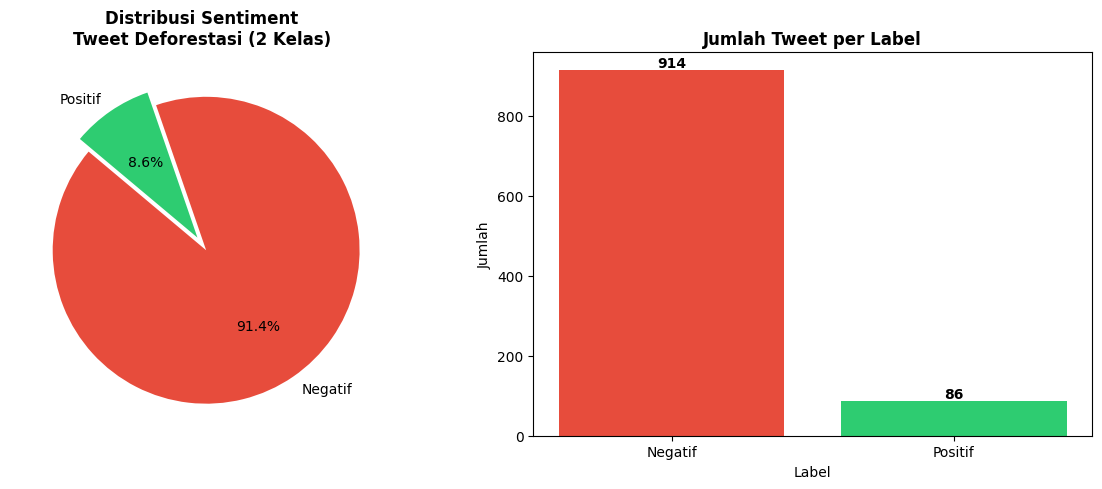

In [ ]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
n_labels = len(label_counts)

colors_dict = {'Negatif': '#e74c3c', 'Positif': '#2ecc71'}
color_list = [colors_dict[label] for label in label_counts.index]
explode_tuple = tuple([0.05] * n_labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
axes[0].pie(label_counts,
            labels=label_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=color_list,
            explode=explode_tuple)
axes[0].set_title('Distribusi Sentiment\nTweet Deforestasi (2 Kelas)', fontweight='bold', fontsize=12)

# Bar chart
bars = axes[1].bar(label_counts.index,
                   label_counts.values,
                   color=color_list)
axes[1].set_title('Jumlah Tweet per Label', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Jumlah')

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# VERIFIKASI SAMPLE PER LABEL
print("=== SAMPLE TWEET YANG DILABEL POSITIF ===\n")
samples_pos = df[df['label'] == 'Positif']['cleaned_text'].head(10).tolist()
for i, text in enumerate(samples_pos, 1):
    print(f"{i}. {text[:100]}...")

print("\n=== SAMPLE TWEET YANG DILABEL NEGATIF ===\n")
samples_neg = df[df['label'] == 'Negatif']['cleaned_text'].head(10).tolist()
for i, text in enumerate(samples_neg, 1):
    print(f"{i}. {text[:100]}...")

=== SAMPLE TWEET YANG DILABEL POSITIF ===

1. kita anti deforestasi bukan anti sawit gw juga masih makan gorengan tiap hari...
2. sawit maupun kopi itu tidak relevan dalam hal deforestasi perkebunan semuanya harus berkelanjutan dl...
3. ya pt toba pulp lestari tpl mengklaim sebagai industri lestari dengan kebijakan nodeforestasi sejak ...
4. raksasa perdagangan kedelai putuskan hengkang dari moratorium deforestasi amazon...
5. udah bnyak influencer influencer pertanian dan eksportir yg bahas ini dri tahun tahun lalu tapi peme...
6. dampak positif eudr mengurangi deforestasi global mendorong praktik pertanian berkelanjutan meningka...
7. intervensi konservasi hutan di wilayah tropis terus berkembang namun dampaknya sering kali terbatas ...
8. mending madas jaga hutanhutan dr pembalak liar amp deforestasi deh pasti didukung seluruh indnesia...
9. waktu itu ada komika nkri yg mocking urban reforestation dibenturin lah sama kasus deforestasi hutan...
10. deforestasi ini banyak yang dipimpi

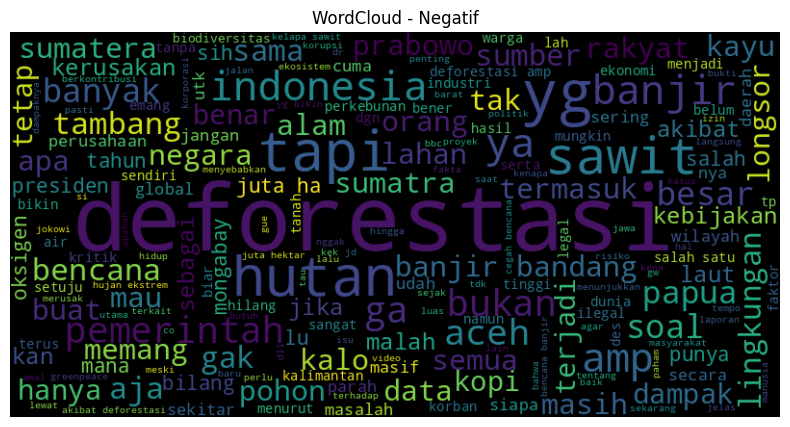

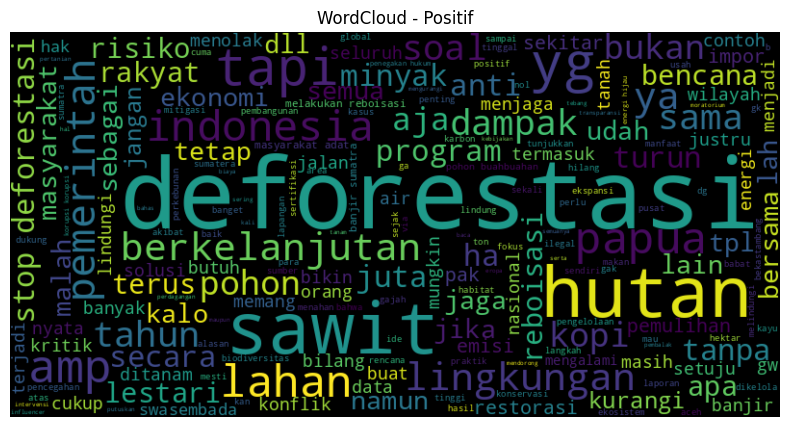

In [ ]:
# WordCloud per sentiment
from wordcloud import WordCloud

for label in df['label'].unique():
    text = ' '.join(df[df['label']==label]['cleaned_text'])
    wordcloud = WordCloud(stopwords=indo_stopwords, width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud - {label}')
    plt.axis('off')
    plt.show()

## 6. Split Data Train/Validation/Test

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 700, Validation: 150, Test: 150


Distribusi Label pada Data Training:
label
Negatif    640
Positif     60
Name: count, dtype: int64

Persentase:
label
Negatif    91.4
Positif     8.6
Name: proportion, dtype: float64


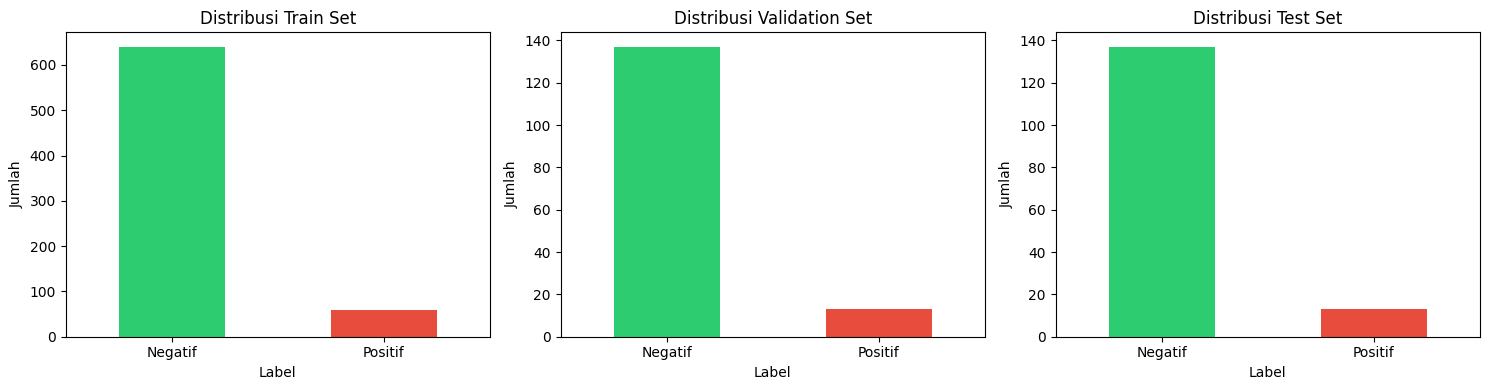

In [ ]:
# ANALISIS & HANDLING DATA IMBALANCE

print("Distribusi Label pada Data Training:")
print(train_df['label'].value_counts())
print(f"\nPersentase:")
print((train_df['label'].value_counts(normalize=True) * 100).round(1))

# Visualisasi distribusi
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, data) in zip(axes, [('Train', train_df), ('Validation', val_df), ('Test', test_df)]):
    data['label'].value_counts().plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])
    ax.set_title(f'Distribusi {name} Set')
    ax.set_xlabel('Label')
    ax.set_ylabel('Jumlah')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 7. Setup Model IndoBERT



In [ ]:
!pip install transformers datasets accelerate evaluate scikit-learn

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import evaluate
import numpy as np

# REVISI: Menggunakan IndoBERT untuk hyperparameter tuning (sama dengan model comparison)
model_name = "indobenchmark/indobert-base-p1"

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Mapping label ke angka (2 kelas)
label2id = {'Negatif': 0, 'Positif': 1}
id2label = {0: 'Negatif', 1: 'Positif'}

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)

# HANDLING IMBALANCE DENGAN CLASS WEIGHTS
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch import nn
import numpy as np

train_labels = [label2id[l] for l in train_df['label']]
existing_classes = np.unique(train_labels)

# Hitung bobot hanya untuk kelas yang tersedia
weights = compute_class_weight(
    class_weight='balanced',
    classes=existing_classes,
    y=train_labels
)

class_weights = torch.zeros(2, dtype=torch.float)
for i, cls_idx in enumerate(existing_classes):
    class_weights[cls_idx] = float(weights[i])

print("--- Hasil Perhitungan Class Weights ---")
for i, label in id2label.items():
    status = "Tersedia" if i in existing_classes else "KOSONG"
    print(f"  {label} ({i}): {class_weights[i]:.3f} - {status}")

# CUSTOM TRAINER
class WeightedTrainer(Trainer):
    def __init__(self, class_weights, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        weight = self.class_weights.to(logits.device)
        loss_fn = nn.CrossEntropyLoss(weight=weight)
        loss = loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- Hasil Perhitungan Class Weights ---
  Negatif (0): 0.547 - Tersedia
  Positif (1): 5.833 - Tersedia


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

# Convert to HuggingFace Dataset
train_dataset = Dataset.from_pandas(train_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))
val_dataset = Dataset.from_pandas(val_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))
test_dataset = Dataset.from_pandas(test_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))

# Encode labels
train_dataset = train_dataset.map(lambda x: {'label': label2id[x['label']]})
val_dataset = val_dataset.map(lambda x: {'label': label2id[x['label']]})
test_dataset = test_dataset.map(lambda x: {'label': label2id[x['label']]})

# Tokenize
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

## 8. Hyperparameter Tuning dengan IndoBERT



In [ ]:
import torch
import gc
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import evaluate

# Define metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Hyperparameter yang akan diuji
learning_rates = [1e-5, 2e-5, 5e-5]
batch_sizes = [8, 16]
epochs_list = [3, 5]

# REVISI: Model yang digunakan untuk hyperparameter tuning = IndoBERT (sama dengan model comparison)
hp_model_name = "indobenchmark/indobert-base-p1"

experiment_results = []
experiment_id = 1

print("="*60)
print(f"HYPERPARAMETER TUNING DENGAN MODEL: {hp_model_name}")
print("="*60)

# Loop untuk setiap kombinasi
for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epochs_list:

            print(f"\n{'='*60}")
            print(f"Eksperimen {experiment_id}: LR={lr}, Batch={batch}, Epochs={epochs}")
            print(f"{'='*60}")

            # Load ulang model untuk setiap eksperimen (PENTING!)
            model = AutoModelForSequenceClassification.from_pretrained(
                hp_model_name,
                num_labels=2,
                id2label=id2label,
                label2id=label2id
            )

            training_args = TrainingArguments(
                output_dir=f"./results/exp_{experiment_id}",
                eval_strategy="epoch",
                save_strategy="epoch",
                learning_rate=lr,
                per_device_train_batch_size=batch,
                per_device_eval_batch_size=batch,
                num_train_epochs=epochs,
                weight_decay=0.01,
                load_best_model_at_end=True,
                metric_for_best_model="accuracy",
                report_to="none",
                save_total_limit=1,
            )

            # Trainer
            trainer = WeightedTrainer(
                class_weights=class_weights,
                model=model,
                args=training_args,
                train_dataset=train_dataset,
                eval_dataset=val_dataset,
                compute_metrics=compute_metrics,
            )

            # Train!
            train_result = trainer.train()

            # Evaluasi
            eval_result = trainer.evaluate()

            # Simpan hasil
            experiment_results.append({
                'experiment_id': experiment_id,
                'learning_rate': lr,
                'batch_size': batch,
                'epochs': epochs,
                'train_loss': train_result.training_loss,
                'val_accuracy': eval_result['eval_accuracy'],
                'val_loss': eval_result['eval_loss'],
            })

            print(f" Val Accuracy: {eval_result['eval_accuracy']:.4f}")

            # Bersihkan memory
            del model, trainer
            import gc
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

            experiment_id += 1

print("\n" + "="*60)
print("SEMUA EKSPERIMEN SELESAI!")
print("="*60)

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

HYPERPARAMETER TUNING DENGAN MODEL: indobenchmark/indobert-base-p1

Eksperimen 1: LR=1e-05, Batch=8, Epochs=3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.227943,0.913333
2,No log,1.355111,0.913333
3,No log,1.276343,0.913333


 Val Accuracy: 0.9133

Eksperimen 2: LR=1e-05, Batch=8, Epochs=5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.304357,0.913333
2,No log,1.322222,0.913333
3,No log,1.188336,0.913333
4,No log,1.224459,0.906667
5,No log,1.479216,0.920000


 Val Accuracy: 0.9200

Eksperimen 3: LR=1e-05, Batch=16, Epochs=3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.679543,0.900000
2,No log,0.722639,0.846667
3,No log,0.695976,0.846667


 Val Accuracy: 0.9000

Eksperimen 4: LR=1e-05, Batch=16, Epochs=5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.674526,0.893333
2,No log,0.797191,0.866667
3,No log,0.711375,0.880000
4,No log,1.167289,0.906667
5,No log,1.170751,0.906667


 Val Accuracy: 0.9067

Eksperimen 5: LR=2e-05, Batch=8, Epochs=3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.234921,0.913333
2,No log,1.162875,0.913333
3,No log,0.963173,0.900000


 Val Accuracy: 0.9133

Eksperimen 6: LR=2e-05, Batch=8, Epochs=5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.193726,0.913333
2,No log,0.816570,0.906667
3,No log,1.142807,0.913333
4,No log,1.357430,0.906667
5,No log,1.466530,0.913333


 Val Accuracy: 0.9133

Eksperimen 7: LR=2e-05, Batch=16, Epochs=3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.653621,0.846667
2,No log,0.853673,0.893333
3,No log,0.847054,0.913333


 Val Accuracy: 0.9133

Eksperimen 8: LR=2e-05, Batch=16, Epochs=5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.694332,0.860000
2,No log,1.069617,0.880000
3,No log,1.023200,0.866667
4,No log,1.480580,0.880000
5,No log,1.742513,0.906667


 Val Accuracy: 0.9067

Eksperimen 9: LR=5e-05, Batch=8, Epochs=3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.020381,0.913333
2,No log,0.917772,0.920000
3,No log,1.286584,0.900000


 Val Accuracy: 0.9200

Eksperimen 10: LR=5e-05, Batch=8, Epochs=5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.800739,0.913333
2,No log,1.133982,0.926667
3,No log,1.871943,0.913333
4,No log,1.675850,0.920000
5,No log,1.654960,0.926667


 Val Accuracy: 0.9267

Eksperimen 11: LR=5e-05, Batch=16, Epochs=3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.656879,0.800000
2,No log,1.027512,0.886667
3,No log,1.545632,0.920000


 Val Accuracy: 0.9200

Eksperimen 12: LR=5e-05, Batch=16, Epochs=5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.685728,0.840000
2,No log,1.256222,0.900000
3,No log,2.320562,0.913333
4,No log,2.300645,0.920000
5,No log,2.183367,0.913333


 Val Accuracy: 0.9200

SEMUA EKSPERIMEN SELESAI!


=== HASIL HYPERPARAMETER TUNING ===



,experiment_id,learning_rate,batch_size,epochs,train_loss,val_accuracy,val_loss
9,10,0.00005,8,5,0.444643,0.926667,1.133982
1,2,0.00001,8,5,0.568979,0.920000,1.479216
11,12,0.00005,16,5,0.282270,0.920000,2.300645
8,9,0.00005,8,3,0.739430,0.920000,0.917772
10,11,0.00005,16,3,0.473750,0.920000,1.545632
5,6,0.00002,8,5,0.460018,0.913333,1.193726
0,1,0.00001,8,3,0.862833,0.913333,1.227943
6,7,0.00002,16,3,0.478058,0.913333,0.847054
4,5,0.00002,8,3,0.752705,0.913333,1.234921
3,4,0.00001,16,5,0.384751,0.906667,1.167289



🏆 BEST CONFIGURATION:
   Learning Rate: 5e-05
   Batch Size: 8.0
   Epochs: 5.0
   Val Accuracy: 0.9267


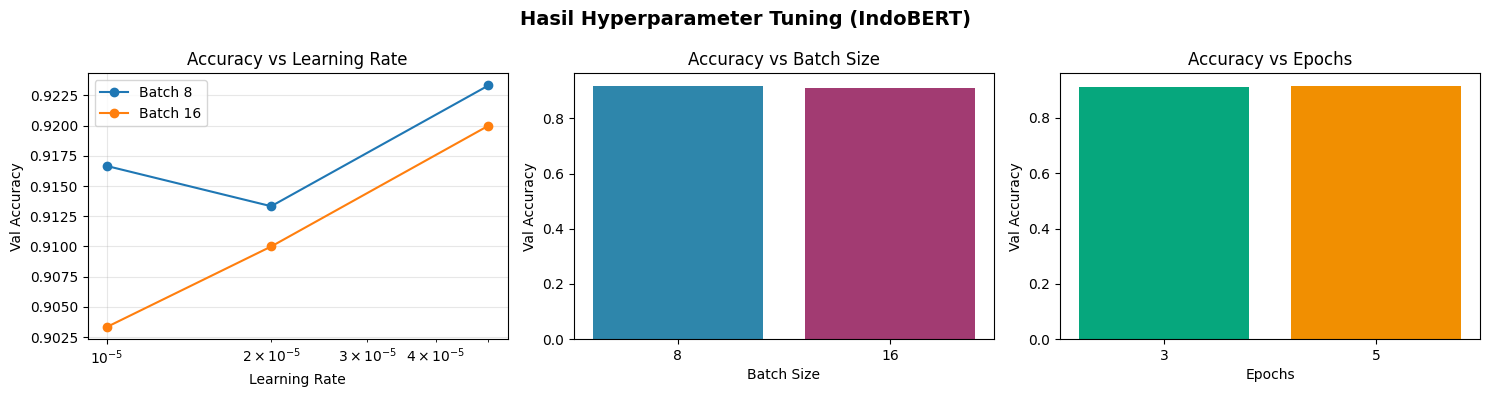


### Tabel Hasil Hyperparameter Tuning

| No | Learning Rate | Batch Size | Epochs | Val Accuracy | Val Loss |
|:--:|:-------------:|:----------:|:------:|:------------:|:--------:|
| 10.0 | 5e-05 | 8 | 5 | 0.9267 | 1.1340 |
| 2.0 | 1e-05 | 8 | 5 | 0.9200 | 1.4792 |
| 12.0 | 5e-05 | 16 | 5 | 0.9200 | 2.3006 |
| 9.0 | 5e-05 | 8 | 3 | 0.9200 | 0.9178 |
| 11.0 | 5e-05 | 16 | 3 | 0.9200 | 1.5456 |
| 6.0 | 2e-05 | 8 | 5 | 0.9133 | 1.1937 |
| 1.0 | 1e-05 | 8 | 3 | 0.9133 | 1.2279 |
| 7.0 | 2e-05 | 16 | 3 | 0.9133 | 0.8471 |
| 5.0 | 2e-05 | 8 | 3 | 0.9133 | 1.2349 |
| 4.0 | 1e-05 | 16 | 5 | 0.9067 | 1.1673 |
| 8.0 | 2e-05 | 16 | 5 | 0.9067 | 1.7425 |
| 3.0 | 1e-05 | 16 | 3 | 0.9000 | 0.6795 |


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['experiment_id'].plot(kind='hist', bins=20, title='experiment_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['learning_rate'].plot(kind='hist', bins=20, title='learning_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['batch_size'].plot(kind='hist', bins=20, title='batch_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='experiment_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='experiment_id', y='learning_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='learning_rate', y='batch_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='batch_size', y='epochs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['experiment_id'].plot(kind='line', figsize=(8, 4), title='experiment_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['learning_rate'].plot(kind='line', figsize=(8, 4), title='learning_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['batch_size'].plot(kind='line', figsize=(8, 4), title='batch_size')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Hasil semua eksperimen
import pandas as pd

results_df = pd.DataFrame(experiment_results)
results_df = results_df.sort_values('val_accuracy', ascending=False)

print("=== HASIL HYPERPARAMETER TUNING ===\n")
display(results_df)

# Best configuration
best = results_df.iloc[0]
print(f"\n🏆 BEST CONFIGURATION:")
print(f"   Learning Rate: {best['learning_rate']}")
print(f"   Batch Size: {best['batch_size']}")
print(f"   Epochs: {best['epochs']}")
print(f"   Val Accuracy: {best['val_accuracy']:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Hasil Hyperparameter Tuning (IndoBERT)', fontsize=14, fontweight='bold')

# 1. Accuracy by Learning Rate
ax1 = axes[0]
for batch in batch_sizes:
    data = results_df[results_df['batch_size'] == batch]
    data_grouped = data.groupby('learning_rate')['val_accuracy'].mean()
    ax1.plot(data_grouped.index, data_grouped.values, marker='o', label=f'Batch {batch}')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Val Accuracy')
ax1.set_xscale('log')
ax1.legend()
ax1.set_title('Accuracy vs Learning Rate')
ax1.grid(True, alpha=0.3)

# 2. Accuracy by Batch Size
ax2 = axes[1]
batch_acc = results_df.groupby('batch_size')['val_accuracy'].mean()
ax2.bar(batch_acc.index.astype(str), batch_acc.values, color=['#2E86AB', '#A23B72'])
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Val Accuracy')
ax2.set_title('Accuracy vs Batch Size')

# 3. Accuracy by Epochs
ax3 = axes[2]
epoch_acc = results_df.groupby('epochs')['val_accuracy'].mean()
ax3.bar(epoch_acc.index.astype(str), epoch_acc.values, color=['#06A77D', '#F18F01'])
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Val Accuracy')
ax3.set_title('Accuracy vs Epochs')

plt.tight_layout()
plt.savefig('hyperparameter_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate tabel markdown
print("\n### Tabel Hasil Hyperparameter Tuning\n")
print("| No | Learning Rate | Batch Size | Epochs | Val Accuracy | Val Loss |")
print("|:--:|:-------------:|:----------:|:------:|:------------:|:--------:|")
for _, row in results_df.iterrows():
    print(f"| {row['experiment_id']} | {row['learning_rate']} | {int(row['batch_size'])} | "
          f"{int(row['epochs'])} | {row['val_accuracy']:.4f} | {row['val_loss']:.4f} |")

## 9. Perbandingan Model

Menggunakan hyperparameter terbaik dari hasil tuning

In [ ]:
# EKSPERIMEN: PERBANDINGAN MODEL

import torch
import gc
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments
from datasets import Dataset
import pandas as pd

# Ambil best hyperparameter dari eksperimen sebelumnya
best = results_df.iloc[0]
BEST_LR = best['learning_rate']
BEST_BATCH = int(best['batch_size'])
BEST_EPOCHS = int(best['epochs'])

print("="*60)
print("EKSPERIMEN PERBANDINGAN MODEL")
print(f"Menggunakan: LR={BEST_LR}, Batch={BEST_BATCH}, Epochs={BEST_EPOCHS}")
print("="*60)

# Daftar model yang akan dibandingkan
MODELS = [
    {
        'name': 'IndoLEM-IndoBERT',
        'model_id': 'indolem/indobert-base-uncased'
    },
    {
        'name': 'IndoBenchmark-IndoBERT',
        'model_id': 'indobenchmark/indobert-base-p1'
    },
    {
        'name': 'mBERT-Multilingual',
        'model_id': 'bert-base-multilingual-uncased'
    }
]

# Simpan hasil
model_results = []

for model_info in MODELS:
    print(f"\n{'='*60}")
    print(f"Training: {model_info['name']}")
    print(f"{'='*60}")

    # Cleanup memory sebelum load model baru
    gc.collect()
    torch.cuda.empty_cache()

    tokenizer = AutoTokenizer.from_pretrained(model_info['model_id'])

    train_ds = Dataset.from_pandas(
        train_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True)
    )
    val_ds = Dataset.from_pandas(
        val_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True)
    )

    def tokenize_function(examples):
        return tokenizer(
            examples['text'],
            padding='max_length',
            truncation=True,
            max_length=128
        )

    train_ds = train_ds.map(lambda x: {'label': label2id[x['label']]})
    val_ds = val_ds.map(lambda x: {'label': label2id[x['label']]})

    train_ds = train_ds.map(tokenize_function, batched=True, remove_columns=['text'])
    val_ds = val_ds.map(tokenize_function, batched=True, remove_columns=['text'])

    train_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
    val_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

    model = AutoModelForSequenceClassification.from_pretrained(
        model_info['model_id'],
        num_labels=2,
        id2label=id2label,
        label2id=label2id
    )

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_info['name'].replace(' ', '_')}",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=BEST_LR,
        per_device_train_batch_size=BEST_BATCH,
        per_device_eval_batch_size=BEST_BATCH,
        num_train_epochs=BEST_EPOCHS,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        report_to="none",
        save_total_limit=1,
    )

    # Trainer dengan dataset yang sudah di-tokenize
    trainer = WeightedTrainer(
        class_weights=class_weights,
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        compute_metrics=compute_metrics,
    )

    # Train
    train_result = trainer.train()
    eval_result = trainer.evaluate()

    # Simpan hasil
    model_results.append({
        'model_name': model_info['name'],
        'model_id': model_info['model_id'],
        'val_accuracy': eval_result['eval_accuracy'],
        'val_loss': eval_result['eval_loss'],
        'train_loss': train_result.training_loss,
    })

    print(f" {model_info['name']} - Val Accuracy: {eval_result['eval_accuracy']:.4f}")

    # Cleanup setelah selesai
    del model, trainer, tokenizer, train_ds, val_ds
    gc.collect()
    torch.cuda.empty_cache()

print("\n" + "="*60)
print("PERBANDINGAN MODEL SELESAI!")
print("="*60)

model_results_df = pd.DataFrame(model_results).sort_values('val_accuracy', ascending=False)
display(model_results_df)

EKSPERIMEN PERBANDINGAN MODEL
Menggunakan: LR=5e-05, Batch=8, Epochs=5

Training: IndoLEM-IndoBERT


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.182785,0.913333
2,No log,1.299050,0.913333
3,No log,1.223428,0.906667
4,No log,1.397762,0.913333
5,No log,1.739180,0.926667


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

 IndoLEM-IndoBERT - Val Accuracy: 0.9267

Training: IndoBenchmark-IndoBERT


Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.005608,0.913333
2,No log,0.919392,0.926667
3,No log,1.078337,0.926667
4,No log,1.059707,0.933333
5,No log,1.471449,0.926667


 IndoBenchmark-IndoBERT - Val Accuracy: 0.9333

Training: mBERT-Multilingual


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.770590,0.913333
2,No log,1.087632,0.913333
3,No log,0.648050,0.913333
4,No log,0.647534,0.913333
5,No log,0.659337,0.913333


 mBERT-Multilingual - Val Accuracy: 0.9133

PERBANDINGAN MODEL SELESAI!


,model_name,model_id,val_accuracy,val_loss,train_loss
1,IndoBenchmark-IndoBERT,indobenchmark/indobert-base-p1,0.933333,1.059707,0.529429
0,IndoLEM-IndoBERT,indolem/indobert-base-uncased,0.926667,1.739180,0.807487
2,mBERT-Multilingual,bert-base-multilingual-uncased,0.913333,0.770590,0.746658


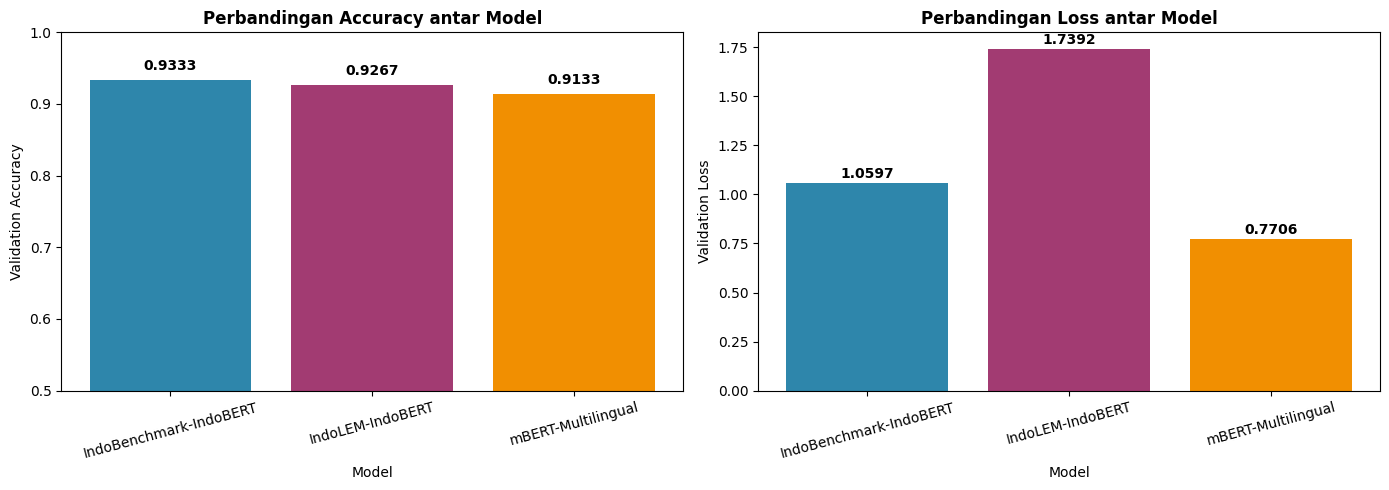


🏆 MODEL TERBAIK: IndoBenchmark-IndoBERT
   Accuracy: 0.9333
   Loss: 1.0597


In [ ]:
# Visualisasi perbandingan model
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Accuracy comparison
ax1 = axes[0]
colors = ['#2E86AB', '#A23B72', '#F18F01']
bars = ax1.bar(model_results_df['model_name'], model_results_df['val_accuracy'], color=colors)
ax1.set_xlabel('Model')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title('Perbandingan Accuracy antar Model', fontweight='bold')
ax1.set_ylim(0.5, 1.0)
for bar, acc in zip(bars, model_results_df['val_accuracy']):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
ax1.tick_params(axis='x', rotation=15)

# 2. Loss comparison
ax2 = axes[1]
bars = ax2.bar(model_results_df['model_name'], model_results_df['val_loss'], color=colors)
ax2.set_xlabel('Model')
ax2.set_ylabel('Validation Loss')
ax2.set_title('Perbandingan Loss antar Model', fontweight='bold')
for bar, loss in zip(bars, model_results_df['val_loss']):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{loss:.4f}', ha='center', va='bottom', fontweight='bold')
ax2.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Best model
best_model = model_results_df.iloc[0]
print(f"\n🏆 MODEL TERBAIK: {best_model['model_name']}")
print(f"   Accuracy: {best_model['val_accuracy']:.4f}")
print(f"   Loss: {best_model['val_loss']:.4f}")

## 10. Training Model Terbaik & Evaluasi Final

In [ ]:
# Training model terbaik untuk evaluasi final
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Gunakan model terbaik
best_model_id = model_results_df.iloc[0]['model_id']
best_model_name = model_results_df.iloc[0]['model_name']

print(f"Training final model: {best_model_name}")

# Load tokenizer dan model
final_tokenizer = AutoTokenizer.from_pretrained(best_model_id)

# Prepare datasets
train_ds = Dataset.from_pandas(
    train_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True)
)
test_ds = Dataset.from_pandas(
    test_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True)
)

def tokenize_function(examples):
    return final_tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=128
    )

train_ds = train_ds.map(lambda x: {'label': label2id[x['label']]})
test_ds = test_ds.map(lambda x: {'label': label2id[x['label']]})

train_ds = train_ds.map(tokenize_function, batched=True, remove_columns=['text'])
test_ds = test_ds.map(tokenize_function, batched=True, remove_columns=['text'])

train_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
final_model = AutoModelForSequenceClassification.from_pretrained(
    best_model_id,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)

# Training
training_args = TrainingArguments(
    output_dir="./results/final_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=BEST_LR,
    per_device_train_batch_size=BEST_BATCH,
    per_device_eval_batch_size=BEST_BATCH,
    num_train_epochs=BEST_EPOCHS,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none",
    save_total_limit=1,
)

final_trainer = WeightedTrainer(
    class_weights=class_weights,
    model=final_model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

final_trainer.train()

Training final model: IndoBenchmark-IndoBERT


Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.073825,0.913333
2,No log,1.218366,0.886667
3,No log,1.748021,0.893333
4,No log,1.932473,0.900000
5,No log,2.143643,0.900000


TrainOutput(global_step=440, training_loss=0.5294294183904474, metrics={'train_runtime': 33.5672, 'train_samples_per_second': 104.268, 'train_steps_per_second': 13.108, 'total_flos': 230222173440000.0, 'train_loss': 0.5294294183904474, 'epoch': 5.0})

EVALUASI FINAL PADA TEST SET

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.91      1.00      0.95       137
     Positif       0.00      0.00      0.00        13

    accuracy                           0.91       150
   macro avg       0.46      0.50      0.48       150
weighted avg       0.83      0.91      0.87       150



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


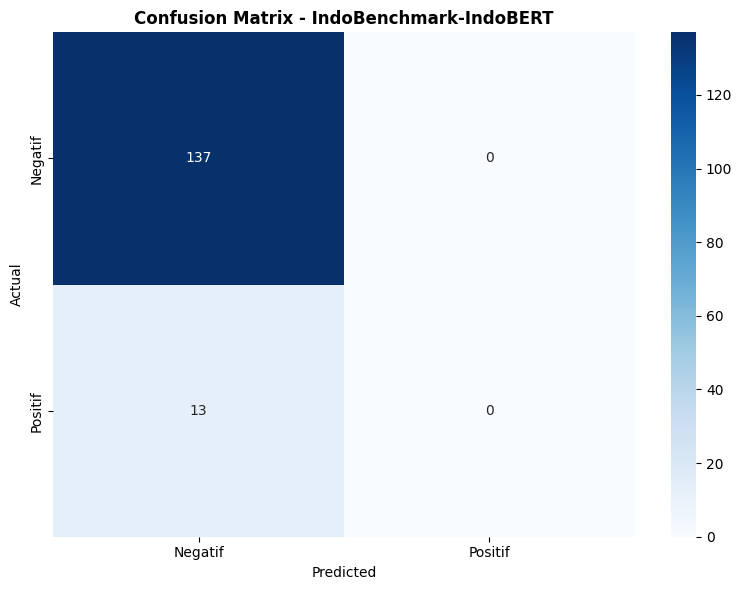


 TEST ACCURACY: 0.9133


In [ ]:
# Evaluasi pada test set
predictions = final_trainer.predict(test_ds)
pred_labels = np.argmax(predictions.predictions, axis=-1)
true_labels = predictions.label_ids

# Classification report
print("=" * 60)
print("EVALUASI FINAL PADA TEST SET")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=['Negatif', 'Positif']))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Test accuracy
test_accuracy = (pred_labels == true_labels).mean()
print(f"\n TEST ACCURACY: {test_accuracy:.4f}")

In [ ]:
# Simpan model
final_model.save_pretrained('./final_sentiment_model')
final_tokenizer.save_pretrained('./final_sentiment_model')
print("Model tersimpan di ./final_sentiment_model")

Model tersimpan di ./final_sentiment_model


## 11. Ringkasan Hasil


In [ ]:
# RINGKASAN AKHIR
print("="*60)
print("RINGKASAN HASIL ANALISIS SENTIMEN")
print("="*60)

print(f"\n DATASET:")
print(f"   - Total data setelah preprocessing: {len(df)} tweets")
print(f"   - Kelas: 2 (Positif, Negatif)")
print(f"   - Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

print(f"\n HYPERPARAMETER TERBAIK:")
print(f"   - Learning Rate: {BEST_LR}")
print(f"   - Batch Size: {BEST_BATCH}")
print(f"   - Epochs: {BEST_EPOCHS}")

print(f"\n MODEL TERBAIK: {best_model_name}")
print(f"   - Validation Accuracy: {model_results_df.iloc[0]['val_accuracy']:.4f}")
print(f"   - Test Accuracy: {test_accuracy:.4f}")


RINGKASAN HASIL ANALISIS SENTIMEN

 DATASET:
   - Total data setelah preprocessing: 1000 tweets
   - Kelas: 2 (Positif, Negatif)
   - Train: 700, Val: 150, Test: 150

 HYPERPARAMETER TERBAIK:
   - Learning Rate: 5e-05
   - Batch Size: 8
   - Epochs: 5

 MODEL TERBAIK: IndoBenchmark-IndoBERT
   - Validation Accuracy: 0.9333
   - Test Accuracy: 0.9133
